<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Plot-simulated-mCAs" data-toc-modified-id="Plot-simulated-mCAs-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Plot simulated mCAs</a></span></li><li><span><a href="#Plot-simulated-mCAs-with-haplotype-phasing" data-toc-modified-id="Plot-simulated-mCAs-with-haplotype-phasing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plot simulated mCAs with haplotype phasing</a></span></li></ul></div>

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [38]:
# import packages
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [5]:
plt.style.use('cwpython.mplstyle') #use custom style file

In [6]:
# Lists of colors for plots
c0 = (0.76, 0.76, 0.76)
c1 = (1.00, 0.18, 0.33);
c2 = (1.00, 0.23, 0.19);
c3 = (1.00, 0.58, 0.00);
c4 = (1.00, 0.80, 0.00);
c5 = (0.30, 0.85, 0.39);
c6 = (0.35, 0.78, 0.98);
c7 = (0.20, 0.67, 0.86);
c8 = (0.00, 0.48, 1.00);
c9 = (0.35, 0.34, 0.84);
c10 = (0.00, 0.31, 0.57);
c11 = (0.12, 0.29, 0.69);
c12 = (0.17, 0.17, 0.42);
c13 = (1.00, 1.00, 1.00);
c14 = (0.77, 0.04, 0.00);

In [7]:
#define the colors from colorbrewer2
orange1 = '#feedde'
orange2 = '#fdbe85'
orange3 = '#fd8d3c'
orange4 = '#e6550d'
orange5 = '#a63603'
blue1 = '#eff3ff'
blue2 = '#bdd7e7'
blue3 = '#6baed6'
blue4 = '#3182bd'
blue5 = '#08519c'
green1 = '#edf8e9'
green2 = '#bae4b3'
green3 = '#74c476'
green4 = '#31a354'
green5 = '#006d2c'
grey1 = '#f7f7f7'
grey2 = '#cccccc'
grey3 = '#969696'
grey4 = '#636363'
grey5 = '#252525'
purple1 = '#f2f0f7'
purple2 = '#cbc9e2'
purple3 = '#9e9ac8'
purple4 = '#756bb1'
purple5 = '#54278f'
red1 = '#fee5d9'
red2 = '#fcae91'
red3 = '#fb6a4a'
red4 = '#de2d26'
red5 = '#a50f15'
yellow = '#ffffd4'

# Plot simulated mCAs

In [7]:
mean_read_depth = 900

In [15]:
def SNPs_LRR_list(mCA, cell_fraction, number_SNPs, mean_read_depth):
    
    SNPs_list = []
    LRR_list = []
    averages = []
    
    for i in range(number_SNPs):
        SNP_type = [0, 0.5, 1.0]
        hetero_homo = random.choice(SNP_type)

        if hetero_homo == 0:
            VAF = 0

        if hetero_homo == 1:
            VAF = 1

        if hetero_homo == 0.5: #heterozygous SNP
            if mCA == 'loss':
                BAF_deviation = (cell_fraction/(2*(2-cell_fraction)))
            if mCA == 'gain':
                BAF_deviation = (cell_fraction/(2*(2+cell_fraction)))
            if mCA == 'CN-LOH':
                BAF_deviation = cell_fraction/2
            if mCA == 'normal':
                BAF_deviation = 0

            phasing = random.choice(['-', '+'])
            if phasing == '+':
                BAF = 0.5+BAF_deviation
            if phasing == '-':
                BAF = 0.5-BAF_deviation
            VAF = (np.random.binomial(mean_read_depth, BAF, 1)[0])/mean_read_depth
            
            averages = (0.5+BAF_deviation, 0.5-BAF_deviation)
            
        SNPs_list.append(VAF)
        
        if mCA == 'loss':
            LRR_list.append(np.log2((2-cell_fraction)/2))
        if mCA == 'gain':
            LRR_list.append(np.log2((2+cell_fraction)/2))
        if mCA == 'CN-LOH':
            LRR_list.append(0)
        if mCA == 'normal':
            LRR_list.append(0)
        
    return (SNPs_list, LRR_list, averages)

In [11]:
def SNPs_plot(mCA_type, cell_fraction, number_SNPs, mean_read_depth, ax):
    m_size = 100
    axisfont=15
    titlefont=15
    axislabelfont=15
    exonfont=12
    
    SNPs, LRR, average_BAF = SNPs_LRR_list(mCA_type, cell_fraction, number_SNPs, mean_read_depth)

    #SNPs
    x1 = []
    y1 = []
    counter = 1
    for i in SNPs:
        x1.append(counter)
        y1.append(i)
        counter+=1
        
    if mCA_type == 'gain':
        color = red4
    if mCA_type == 'loss':
        color = blue4
    if mCA_type == 'CN-LOH':
        color = orange3
    if mCA_type == 'normal':
        color = grey5

    ax.scatter(x1, y1, color = color, zorder = 200, lw = 1)
#     ax.plot([0, number_SNPs], [average_BAF[0], average_BAF[0]], color = color, alpha = 0.2, zorder = 5, lw = 3)
#     ax.plot([0, number_SNPs], [average_BAF[1], average_BAF[1]], color = color, alpha = 0.2, zorder = 5, lw = 3)

    upper_BAF = round(average_BAF[0], 4)
    lower_BAF = round(average_BAF[1], 4)
    
    if upper_BAF<0.7:
        ax.text(0.99, lower_BAF-0.05, str(lower_BAF), transform=ax.transAxes, ha = 'right', va = 'top', fontsize = 13, zorder = 1000)
        ax.text(0.99, upper_BAF+0.05, str(upper_BAF), transform=ax.transAxes, ha = 'right', fontsize = 13, zorder = 1000)
    else:
        ax.text(0.99, lower_BAF+0.05, str(lower_BAF), transform=ax.transAxes, ha = 'right', va = 'bottom', fontsize = 13, zorder = 1000)
        ax.text(0.99, upper_BAF-0.05, str(upper_BAF), transform=ax.transAxes, ha = 'right', va = 'top', fontsize = 13, zorder = 1000)

    # CONFIGURING THE GRAPH APPEARANCE
    ax.set_xlim(0, number_SNPs)

    #x-axis ticks
    x1_major_ticks = []
    x1_major_tick_labels = []
    ax.set_xticks(x1_major_ticks)
    ax.set_xticklabels(x1_major_tick_labels, fontsize = axisfont)

    #y-axis ticks
    y1_major_ticks = []
    y1_major_tick_labels = []
    ax.set_xticks(y1_major_ticks)
    ax.set_xticklabels(y1_major_tick_labels, fontsize = axisfont)
#     ax.tick_params(axis='y', which='major', labelsize=13)

    #Only show the required axis lines
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)

#     ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))

    ax.set_ylim(-0.02, 1.02)

    #Title and axis labels
    ax.set_title(str(int(cell_fraction*100))+'% '+mCA_type, fontweight = 'medium', fontsize = 15, y = 1.05)
    if mCA_type == 'normal':
        ax.set_title('normal', fontweight = 'medium', fontsize = 15, y = 1.05)
#     ax.set_ylabel('BAF', fontsize = axislabelfont)

    return ax

In [21]:
def LRR_plot(mCA_type, cell_fraction, number_SNPs, mean_read_depth, ax):
    m_size = 100
    axisfont=15
    titlefont=15
    axislabelfont=15
    exonfont=12
    
    SNPs, LRR, average_BAF = SNPs_LRR_list(mCA_type, cell_fraction, number_SNPs, mean_read_depth)

    #LRR
    x1 = []
    y1 = []
    counter = 1
    for i in LRR:
        x1.append(counter)
        y1.append(i)
        counter+=1
        
    if mCA_type == 'gain':
        color = red4
    if mCA_type == 'loss':
        color = blue4
    if mCA_type == 'CN-LOH':
        color = orange3
    if mCA_type == 'normal':
        color = grey5

    ax.plot(x1, y1, color = color, zorder = 200, lw = 3)
    
    LRR = y1[0]
    
    ax.text(number_SNPs, LRR+0.075, str(round(LRR, 2)), ha = 'right', fontsize = 13, zorder = 1000)

    # CONFIGURING THE GRAPH APPEARANCE
    ax.set_xlim(0, number_SNPs)

    # Changing the y axis to log scale
    ax.set_ylim(-1.1, 1.)

    #x-axis ticks
    x1_major_ticks = []
    x1_major_tick_labels = []
    ax.set_xticks(x1_major_ticks)
    ax.set_xticklabels(x1_major_tick_labels, fontsize = axisfont)

    #y-axis ticks
    y1_major_ticks = []
    y1_major_tick_labels = []
    ax.set_xticks(y1_major_ticks)
    ax.set_xticklabels(y1_major_tick_labels, fontsize = axisfont)
#     ax.tick_params(axis='y', which='major', labelsize=13)

    #Only show the required axis lines
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)

    #Title and axis labels
#     ax.set_title(mCA_type+': '+str(int(cell_fraction*100))+'% cell fraction')
#     ax.set_ylabel('log2ratio', fontsize = axislabelfont)
    
    return ax

In [13]:
def mCA_plots_different_cell_fractions(mCA_type, mean_read_depth, number_SNPs):
    plt.close('all')
    f, (axes) = plt.subplots(2, 8, sharey=False, sharex = False, figsize=(20, 6), gridspec_kw={'height_ratios': [3, 3]})
    # gs = matplotlib.gridspec.GridSpec(2, 8, height_ratios=[3,1])

    ax1 = axes[0, 0]
    ax2 = axes[0, 1]
    ax3 = axes[0, 2]
    ax4 = axes[0, 3]
    ax5 = axes[0, 4]
    ax6 = axes[0, 5]
    ax7 = axes[0, 6]
    ax8 = axes[0, 7]
    ax9 = axes[1, 0]
    ax10 = axes[1, 1]
    ax11 = axes[1, 2]
    ax12 = axes[1, 3]
    ax13 = axes[1, 4]
    ax14 = axes[1, 5]
    ax15 = axes[1, 6]
    ax16 = axes[1, 7]

    m_size = 100
    axisfont=13
    titlefont=15
    axislabelfont=15
    exonfont=12

    SNPs_plot('normal', 1, number_SNPs, mean_read_depth, ax1)
    SNPs_plot(mCA_type, 0.05, number_SNPs, mean_read_depth, ax2)
    SNPs_plot(mCA_type, 0.1, number_SNPs, mean_read_depth, ax3)
    SNPs_plot(mCA_type, 0.25, number_SNPs, mean_read_depth, ax4)
    SNPs_plot(mCA_type, 0.5, number_SNPs, mean_read_depth, ax5)
    SNPs_plot(mCA_type, 0.75, number_SNPs, mean_read_depth, ax6)
    SNPs_plot(mCA_type, 0.9, number_SNPs, mean_read_depth, ax7)
    SNPs_plot(mCA_type, 1.0, number_SNPs, mean_read_depth, ax8)

    LRR_plot('normal', 1, number_SNPs, mean_read_depth, ax9)
    LRR_plot(mCA_type, 0.05, number_SNPs, mean_read_depth, ax10)
    LRR_plot(mCA_type, 0.1, number_SNPs, mean_read_depth, ax11)
    LRR_plot(mCA_type, 0.25, number_SNPs, mean_read_depth, ax12)
    LRR_plot(mCA_type, 0.5, number_SNPs, mean_read_depth, ax13)
    LRR_plot(mCA_type, 0.75, number_SNPs, mean_read_depth, ax14)
    LRR_plot(mCA_type, 0.9, number_SNPs, mean_read_depth, ax15)
    LRR_plot(mCA_type, 1.0, number_SNPs, mean_read_depth, ax16)

    y1_major_ticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    y1_major_tick_labels = ['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0']
    ax1.set_yticks(y1_major_ticks)
    ax1.set_yticklabels(y1_major_tick_labels, fontsize = axisfont)
    ax1.set_ylabel('BAF')
    ax1.spines['left'].set_visible(True)
    
    for ax in [ax2, ax3, ax4, ax5, ax6, ax7]:
        y1_major_ticks = []
        y1_major_tick_labels = []
        ax.set_yticks(y1_major_ticks)
        ax.set_yticklabels(y1_major_tick_labels, fontsize = axisfont)
        
    y1_major_ticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    y1_major_tick_labels = ['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0']
    ax8.set_yticks(y1_major_ticks)
    ax8.set_yticklabels(y1_major_tick_labels, fontsize = axisfont)
    ax8.set_ylabel('BAF')
    ax8.yaxis.tick_right()
    ax8.yaxis.set_label_position("right")
    ax8.spines['right'].set_visible(True)
        
    y1_major_ticks = [-1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
    y1_major_tick_labels = ['-1.0', '-0.8', '-0.6', '-0.4', '-0.2', '0.0', '0.2', '0.4', '0.6', '0.8', '1.0']
    ax9.set_yticks(y1_major_ticks)
    ax9.set_yticklabels(y1_major_tick_labels, fontsize = axisfont)
    ax9.set_ylabel('log2ratio')
    
    for ax in [ax10, ax11, ax12, ax13, ax14, ax15]:
        y1_major_ticks = []
        y1_major_tick_labels = []
        ax.set_yticks(y1_major_ticks)
        ax.set_yticklabels(y1_major_tick_labels, fontsize = axisfont)
        
    y1_major_ticks = [-1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
    y1_major_tick_labels = ['-1.0', '-0.8', '-0.6', '-0.4', '-0.2', '0.0', '0.2', '0.4', '0.6', '0.8', '1.0']
    ax16.set_yticks(y1_major_ticks)
    ax16.set_yticklabels(y1_major_tick_labels, fontsize = axisfont)
    ax16.set_ylabel('log2ratio')
    ax16.yaxis.tick_right()
    ax16.yaxis.set_label_position("right")
    ax16.spines['right'].set_visible(True)
    
    
    for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]:
        ax.plot([0, number_SNPs], [0.1, 0.1], lw = 2, color = grey2, linestyle = ':')
        ax.plot([0, number_SNPs], [0.2, 0.2], lw = 2, color = grey2, linestyle = ':')
        ax.plot([0, number_SNPs], [0.3, 0.3], lw = 2, color = grey2, linestyle = ':')
        ax.plot([0, number_SNPs], [0.4, 0.4], lw = 2, color = grey2, linestyle = ':')
        ax.plot([0, number_SNPs], [0.5, 0.5], lw = 4, color = grey2, linestyle = ':')
        ax.plot([0, number_SNPs], [0.6, 0.6], lw = 2, color = grey2, linestyle = ':')
        ax.plot([0, number_SNPs], [0.7, 0.7], lw = 2, color = grey2, linestyle = ':')
        ax.plot([0, number_SNPs], [0.8, 0.8], lw = 2, color = grey2, linestyle = ':')
        ax.plot([0, number_SNPs], [0.9, 0.9], lw = 2, color = grey2, linestyle = ':')
        ax.plot([0, number_SNPs], [1.0, 1.0], lw = 2, color = grey2, linestyle = ':')

    for ax in [ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16]:
        ax.plot([0, number_SNPs], [-0.2, -0.2], lw = 2, color = grey2, linestyle = ':')
        ax.plot([0, number_SNPs], [-0.4, -0.4], lw = 2, color = grey2, linestyle = ':')
        ax.plot([0, number_SNPs], [-0.6, -0.6], lw = 2, color = grey2, linestyle = ':')
        ax.plot([0, number_SNPs], [-0.8, -0.8], lw = 2, color = grey2, linestyle = ':')
        ax.plot([0, number_SNPs], [-1.0, -1.0], lw = 2, color = grey2, linestyle = ':')
        ax.plot([0, number_SNPs], [0, 0], lw = 4, color = grey2, linestyle = ':')
        ax.plot([0, number_SNPs], [0.2, 0.2], lw = 2, color = grey2, linestyle = ':')
        ax.plot([0, number_SNPs], [0.4, 0.4], lw = 2, color = grey2, linestyle = ':')
        ax.plot([0, number_SNPs], [0.6, 0.6], lw = 2, color = grey2, linestyle = ':')
        ax.plot([0, number_SNPs], [0.8, 0.8], lw = 2, color = grey2, linestyle = ':')
        ax.plot([0, number_SNPs], [1.0, 1.0], lw = 2, color = grey2, linestyle = ':')

    plt.tight_layout()
    return plt.show()

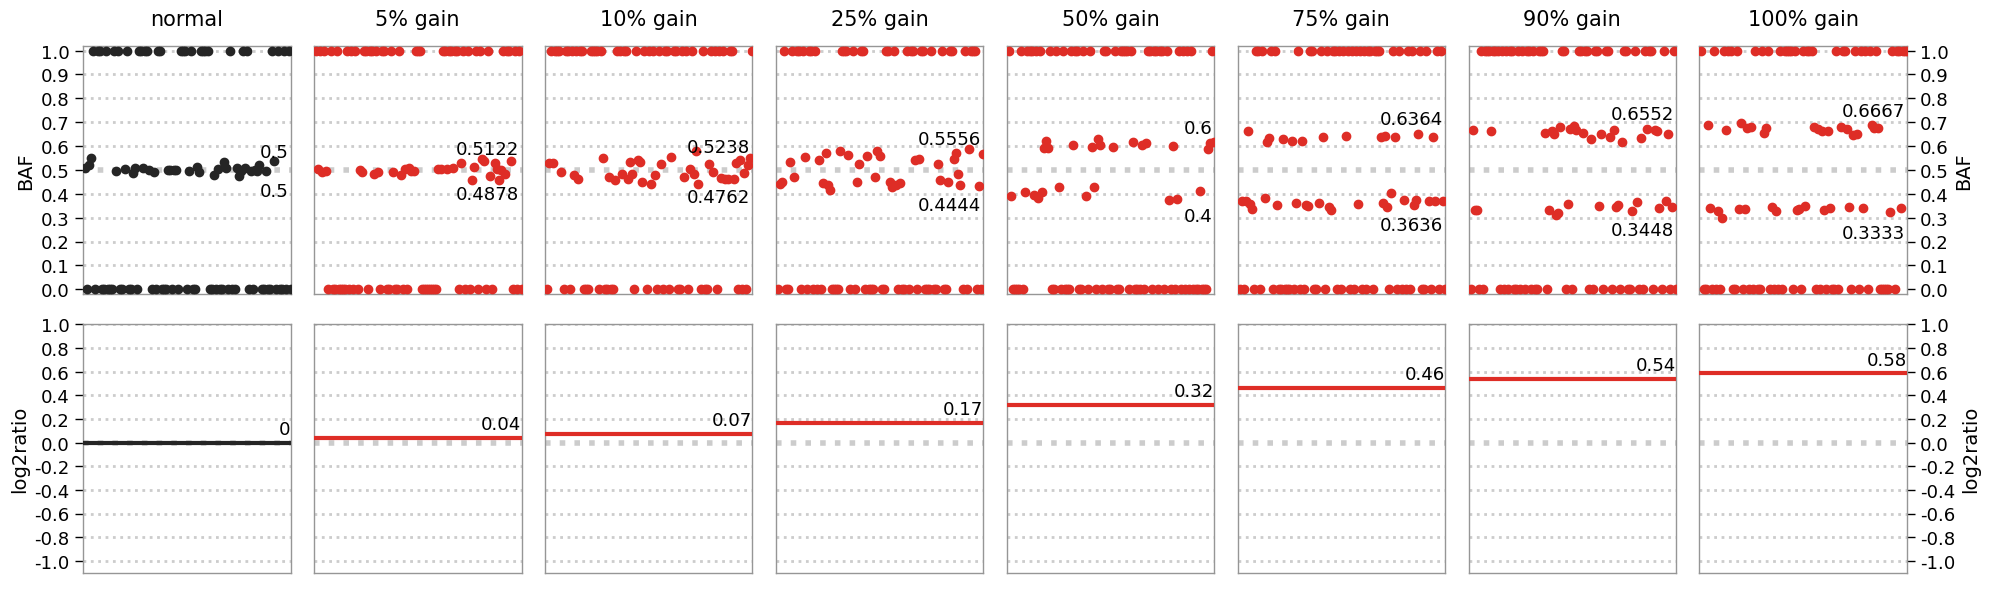

In [22]:
mCA_plots_different_cell_fractions('gain', 1000, 100)

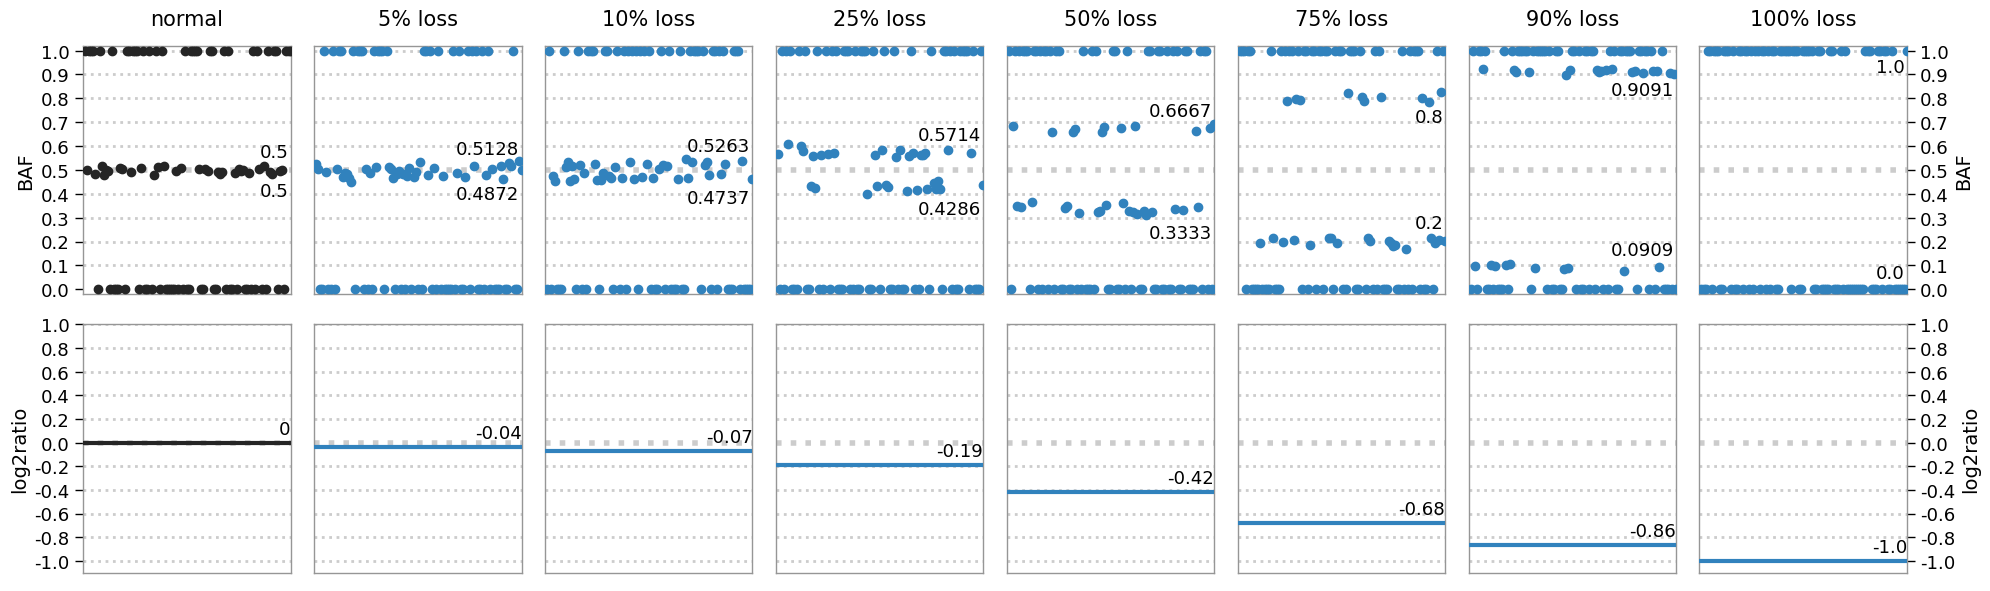

In [23]:
mCA_plots_different_cell_fractions('loss', 1000, 100)

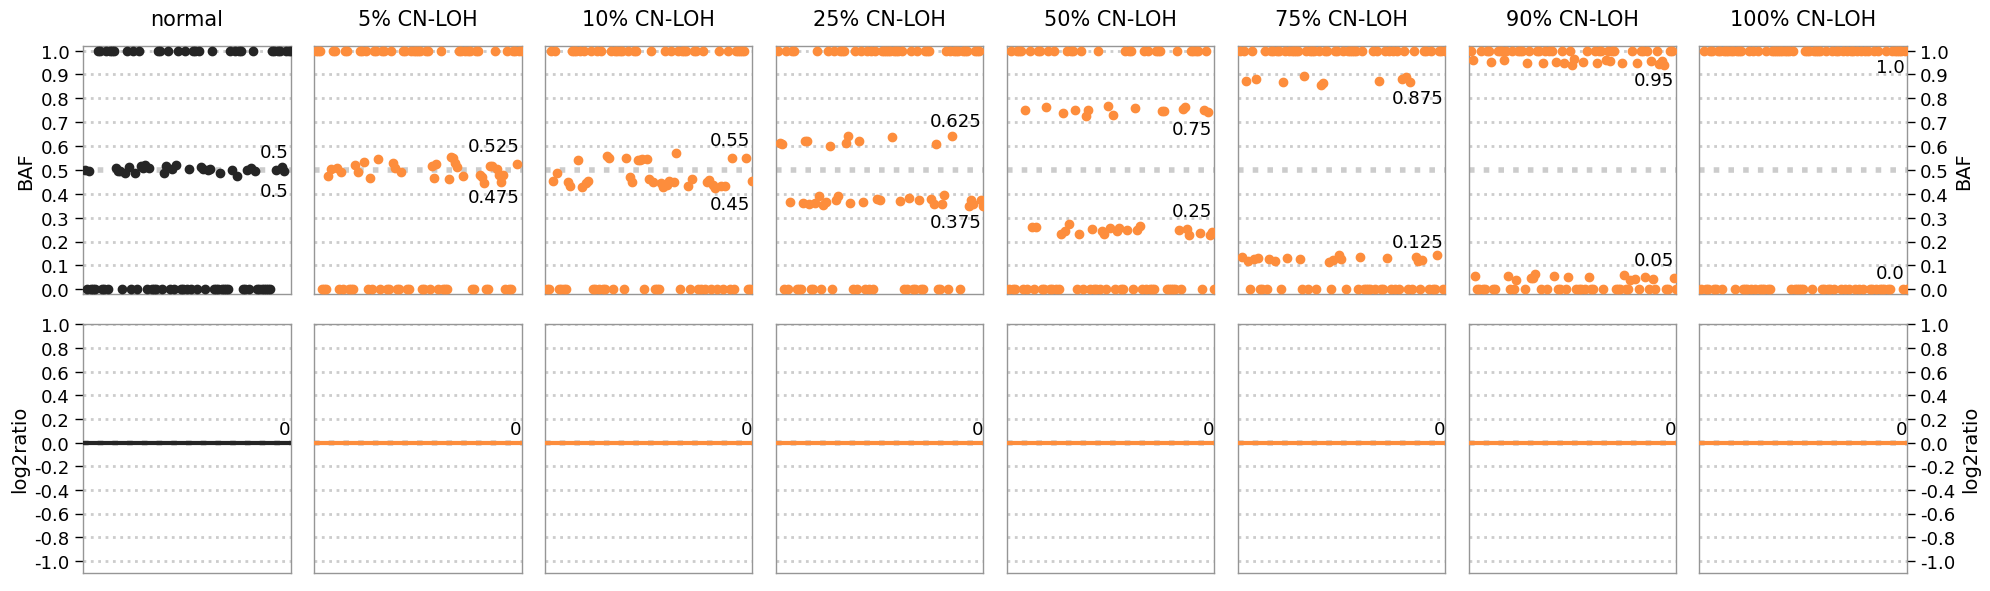

In [24]:
mCA_plots_different_cell_fractions('CN-LOH', 1000, 100)

In [577]:
SNPs, LRR, average_BAF = SNPs_LRR_list('gain', 0.05, 100, 900)

In [614]:
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate

# Plot simulated mCAs with haplotype phasing

In [30]:
def SNPs_LRR_list_haplotypes(mCA, cell_fraction, number_SNPs, mean_read_depth):
    
    SNPs_list_plus = []
    SNPs_list_minus = []
    LRR_list = []
    averages = []
    
    for i in range(number_SNPs):
        SNP_type = [0, 0.5, 1.0]
        hetero_homo = random.choice(SNP_type)

        if hetero_homo == 0:
#             phasing = random.choice(['-', '+'])
            phasing = '-'
            VAF = 0

        if hetero_homo == 1:
#             phasing = random.choice(['-', '+'])
            phasing = '+'
            VAF = 1

        if hetero_homo == 0.5: #heterozygous SNP
            if mCA == 'loss':
                BAF_deviation = (cell_fraction/(2*(2-cell_fraction)))
            if mCA == 'gain':
                BAF_deviation = (cell_fraction/(2*(2+cell_fraction)))
            if mCA == 'CN-LOH':
                BAF_deviation = cell_fraction/2
            if mCA == 'normal':
                BAF_deviation = 0

            phasing = random.choice(['-', '+'])
            if phasing == '+':
                BAF = 0.5+BAF_deviation
            if phasing == '-':
                BAF = 0.5-BAF_deviation
            VAF = (np.random.binomial(mean_read_depth, BAF, 1)[0])/mean_read_depth
            
            averages = (0.5+BAF_deviation, 0.5-BAF_deviation)
            
        if phasing == '+':
            SNPs_list_plus.append(VAF)
        if phasing == '-':
            SNPs_list_minus.append(VAF)
        
        if mCA == 'loss':
            LRR_list.append(np.log2((2-cell_fraction)/2))
        if mCA == 'gain':
            LRR_list.append(np.log2((2+cell_fraction)/2))
        if mCA == 'CN-LOH':
            LRR_list.append(0)
        if mCA == 'normal':
            LRR_list.append(0)
        
    return (SNPs_list_plus, SNPs_list_minus, LRR_list, averages)

In [31]:
def SNPs_plot_haplotypes(mCA_type, cell_fraction, number_SNPs, mean_read_depth, ax):
    m_size = 100
    axisfont=15
    titlefont=15
    axislabelfont=15
    exonfont=12
    
    SNPs_plus, SNPs_loss, LRR, average_BAF = SNPs_LRR_list_haplotypes(mCA_type, cell_fraction, number_SNPs, mean_read_depth)

    #SNPs
    x1 = []
    y1 = []
    x2 = []
    y2 = []
    
    x1_homo1 = []
    y1_homo1 = []
    
    x2_homo0 = []
    y2_homo0 = []
    
    counter = 1
    for i in SNPs_plus:
        if i!=1.0:
            x1.append(counter)
            y1.append(i)
        else:
            x1_homo1.append(counter)
            y1_homo1.append(i)
        counter+=2
    counter = 1
    for i in SNPs_loss:
        if i != 0:
            x2.append(counter)
            y2.append(i)
        else:
            x2_homo0.append(counter)
            y2_homo0.append(i)
        counter+=2
        
    if mCA_type == 'gain':
        color_plus = red4
        color_minus = red2
    if mCA_type == 'loss':
        color_plus = blue4
        color_minus = blue2
    if mCA_type == 'CN-LOH':
        color_plus = orange3
        color_minus = orange2
    if mCA_type == 'normal':
        color_plus = grey5
        color_minus = grey2

    ax.scatter(x1, y1, color = color_plus, zorder = 200, lw = 1)
    ax.scatter(x2, y2, color = color_minus, zorder = 200, lw = 1)
    
    ax.scatter(x1_homo1, y1_homo1, color = grey4, zorder = 200, lw = 1)
    ax.scatter(x2_homo0, y2_homo0, color = grey4, zorder = 200, lw = 1)

    upper_BAF = round(average_BAF[0], 4)
    lower_BAF = round(average_BAF[1], 4)
    
    if upper_BAF<0.7:
        ax.text(0.99, lower_BAF-0.05, str(lower_BAF), transform=ax.transAxes, ha = 'right', va = 'top', fontsize = 13, zorder = 1000)
        ax.text(0.99, upper_BAF+0.05, str(upper_BAF), transform=ax.transAxes, ha = 'right', fontsize = 13, zorder = 1000)
    else:
        ax.text(0.99, lower_BAF+0.05, str(lower_BAF), transform=ax.transAxes, ha = 'right', va = 'bottom', fontsize = 13, zorder = 1000)
        ax.text(0.99, upper_BAF-0.05, str(upper_BAF), transform=ax.transAxes, ha = 'right', va = 'top', fontsize = 13, zorder = 1000)

    # CONFIGURING THE GRAPH APPEARANCE
    ax.set_xlim(0, number_SNPs)

    #x-axis ticks
    x1_major_ticks = []
    x1_major_tick_labels = []
    ax.set_xticks(x1_major_ticks)
    ax.set_xticklabels(x1_major_tick_labels, fontsize = axisfont)

    #y-axis ticks
    y1_major_ticks = []
    y1_major_tick_labels = []
    ax.set_xticks(y1_major_ticks)
    ax.set_xticklabels(y1_major_tick_labels, fontsize = axisfont)
#     ax.tick_params(axis='y', which='major', labelsize=13)

    #Only show the required axis lines
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)

#     ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))

    ax.set_ylim(-0.02, 1.02)

    #Title and axis labels
    ax.set_title(str(int(cell_fraction*100))+'% '+mCA_type, fontweight = 'medium', fontsize = 15, y = 1.05)
    if mCA_type == 'normal':
        ax.set_title('normal', fontweight = 'medium', fontsize = 15, y = 1.05)
#     ax.set_ylabel('BAF', fontsize = axislabelfont)

    return ax

In [32]:
def mCA_plots_different_cell_fractions_haplotypes(mCA_type, mean_read_depth, number_SNPs):
    plt.close('all')
    f, (axes) = plt.subplots(2, 8, sharey=False, sharex = False, figsize=(20, 6), gridspec_kw={'height_ratios': [3, 3]})
    # gs = matplotlib.gridspec.GridSpec(2, 8, height_ratios=[3,1])

    ax1 = axes[0, 0]
    ax2 = axes[0, 1]
    ax3 = axes[0, 2]
    ax4 = axes[0, 3]
    ax5 = axes[0, 4]
    ax6 = axes[0, 5]
    ax7 = axes[0, 6]
    ax8 = axes[0, 7]
    ax9 = axes[1, 0]
    ax10 = axes[1, 1]
    ax11 = axes[1, 2]
    ax12 = axes[1, 3]
    ax13 = axes[1, 4]
    ax14 = axes[1, 5]
    ax15 = axes[1, 6]
    ax16 = axes[1, 7]

    m_size = 100
    axisfont=13
    titlefont=15
    axislabelfont=15
    exonfont=12
    
    SNPs_plot_haplotypes('normal', 1, number_SNPs, mean_read_depth, ax1)
    SNPs_plot_haplotypes(mCA_type, 0.01, number_SNPs, mean_read_depth, ax2)
    SNPs_plot_haplotypes(mCA_type, 0.02, number_SNPs, mean_read_depth, ax3)
    SNPs_plot_haplotypes(mCA_type, 0.05, number_SNPs, mean_read_depth, ax4)
    SNPs_plot_haplotypes(mCA_type, 0.1, number_SNPs, mean_read_depth, ax5)
    SNPs_plot_haplotypes(mCA_type, 0.15, number_SNPs, mean_read_depth, ax6)
    SNPs_plot_haplotypes(mCA_type, 0.25, number_SNPs, mean_read_depth, ax7)
    SNPs_plot_haplotypes(mCA_type, 0.5, number_SNPs, mean_read_depth, ax8)

    LRR_plot('normal', 1, number_SNPs, mean_read_depth, ax9)
    LRR_plot(mCA_type, 0.01, number_SNPs, mean_read_depth, ax10)
    LRR_plot(mCA_type, 0.02, number_SNPs, mean_read_depth, ax11)
    LRR_plot(mCA_type, 0.05, number_SNPs, mean_read_depth, ax12)
    LRR_plot(mCA_type, 0.1, number_SNPs, mean_read_depth, ax13)
    LRR_plot(mCA_type, 0.15, number_SNPs, mean_read_depth, ax14)
    LRR_plot(mCA_type, 0.25, number_SNPs, mean_read_depth, ax15)
    LRR_plot(mCA_type, 0.5, number_SNPs, mean_read_depth, ax16)

    y1_major_ticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    y1_major_tick_labels = ['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0']
    ax1.set_yticks(y1_major_ticks)
    ax1.set_yticklabels(y1_major_tick_labels, fontsize = axisfont)
    ax1.set_ylabel('BAF')
    ax1.spines['left'].set_visible(True)
    
    for ax in [ax2, ax3, ax4, ax5, ax6, ax7]:
        y1_major_ticks = []
        y1_major_tick_labels = []
        ax.set_yticks(y1_major_ticks)
        ax.set_yticklabels(y1_major_tick_labels, fontsize = axisfont)
        
    y1_major_ticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    y1_major_tick_labels = ['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0']
    ax8.set_yticks(y1_major_ticks)
    ax8.set_yticklabels(y1_major_tick_labels, fontsize = axisfont)
    ax8.set_ylabel('BAF')
    ax8.yaxis.tick_right()
    ax8.yaxis.set_label_position("right")
    ax8.spines['right'].set_visible(True)
        
    y1_major_ticks = [-1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
    y1_major_tick_labels = ['-1.0', '-0.8', '-0.6', '-0.4', '-0.2', '0.0', '0.2', '0.4', '0.6', '0.8', '1.0']
    ax9.set_yticks(y1_major_ticks)
    ax9.set_yticklabels(y1_major_tick_labels, fontsize = axisfont)
    ax9.set_ylabel('log2ratio')
    
    for ax in [ax10, ax11, ax12, ax13, ax14, ax15]:
        y1_major_ticks = []
        y1_major_tick_labels = []
        ax.set_yticks(y1_major_ticks)
        ax.set_yticklabels(y1_major_tick_labels, fontsize = axisfont)
        
    y1_major_ticks = [-1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
    y1_major_tick_labels = ['-1.0', '-0.8', '-0.6', '-0.4', '-0.2', '0.0', '0.2', '0.4', '0.6', '0.8', '1.0']
    ax16.set_yticks(y1_major_ticks)
    ax16.set_yticklabels(y1_major_tick_labels, fontsize = axisfont)
    ax16.set_ylabel('log2ratio')
    ax16.yaxis.tick_right()
    ax16.yaxis.set_label_position("right")
    ax16.spines['right'].set_visible(True)
    
    
    for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]:
        ax.plot([0, number_SNPs], [0.1, 0.1], lw = 2, color = grey2, linestyle = ':')
        ax.plot([0, number_SNPs], [0.2, 0.2], lw = 2, color = grey2, linestyle = ':')
        ax.plot([0, number_SNPs], [0.3, 0.3], lw = 2, color = grey2, linestyle = ':')
        ax.plot([0, number_SNPs], [0.4, 0.4], lw = 2, color = grey2, linestyle = ':')
        ax.plot([0, number_SNPs], [0.5, 0.5], lw = 4, color = grey2, linestyle = ':')
        ax.plot([0, number_SNPs], [0.6, 0.6], lw = 2, color = grey2, linestyle = ':')
        ax.plot([0, number_SNPs], [0.7, 0.7], lw = 2, color = grey2, linestyle = ':')
        ax.plot([0, number_SNPs], [0.8, 0.8], lw = 2, color = grey2, linestyle = ':')
        ax.plot([0, number_SNPs], [0.9, 0.9], lw = 2, color = grey2, linestyle = ':')
        ax.plot([0, number_SNPs], [1.0, 1.0], lw = 2, color = grey2, linestyle = ':')

    for ax in [ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16]:
        ax.plot([0, number_SNPs], [-0.2, -0.2], lw = 2, color = grey2, linestyle = ':')
        ax.plot([0, number_SNPs], [-0.4, -0.4], lw = 2, color = grey2, linestyle = ':')
        ax.plot([0, number_SNPs], [-0.6, -0.6], lw = 2, color = grey2, linestyle = ':')
        ax.plot([0, number_SNPs], [-0.8, -0.8], lw = 2, color = grey2, linestyle = ':')
        ax.plot([0, number_SNPs], [-1.0, -1.0], lw = 2, color = grey2, linestyle = ':')
        ax.plot([0, number_SNPs], [0, 0], lw = 4, color = grey2, linestyle = ':')
        ax.plot([0, number_SNPs], [0.2, 0.2], lw = 2, color = grey2, linestyle = ':')
        ax.plot([0, number_SNPs], [0.4, 0.4], lw = 2, color = grey2, linestyle = ':')
        ax.plot([0, number_SNPs], [0.6, 0.6], lw = 2, color = grey2, linestyle = ':')
        ax.plot([0, number_SNPs], [0.8, 0.8], lw = 2, color = grey2, linestyle = ':')
        ax.plot([0, number_SNPs], [1.0, 1.0], lw = 2, color = grey2, linestyle = ':')

    plt.tight_layout()
    #     plt.savefig('SNPs_across_chromosomes/C92_024_s8_CNV_pre_error_correction_chr'+str(chromosome)+'_SNPs.pdf')
    
    if mCA_type == 'gain':
        legend_elements = [Line2D([0], [0], marker = 'o', color=grey5, alpha=1.0, markersize = 8, \
                          lw=0, label='paternal haplotype'),\
                          Line2D([0], [0], marker = 'o', color=grey2, alpha=1.0, markersize = 8, \
                          lw=0, label='maternal haplotype'),
                          Line2D([0], [0], marker = 'o', color=red4, alpha=1.0, markersize = 8, \
                          lw=0, label='paternal haplotype'),
                          Line2D([0], [0], marker = 'o', color=red2, alpha=1.0, markersize = 8, \
                          lw=0, label='materal haplotype')]
    if mCA_type == 'loss':
        legend_elements = [Line2D([0], [0], marker = 'o', color=grey5, alpha=1.0, markersize = 8, \
                          lw=0, label='paternal haplotype'),\
                          Line2D([0], [0], marker = 'o', color=grey2, alpha=1.0, markersize = 8, \
                          lw=0, label='maternal haplotype'),
                          Line2D([0], [0], marker = 'o', color=blue4, alpha=1.0, markersize = 8, \
                          lw=0, label='paternal haplotype'),
                          Line2D([0], [0], marker = 'o', color=blue2, alpha=1.0, markersize = 8, \
                          lw=0, label='materal haplotype')]
    if mCA_type == 'CN-LOH':
        legend_elements = [Line2D([0], [0], marker = 'o', color=grey5, alpha=1.0, markersize = 8, \
                          lw=0, label='paternal haplotype'),\
                          Line2D([0], [0], marker = 'o', color=grey2, alpha=1.0, markersize = 8, \
                          lw=0, label='maternal haplotype'),
                          Line2D([0], [0], marker = 'o', color=orange3, alpha=1.0, markersize = 8, \
                          lw=0, label='paternal haplotype'),
                          Line2D([0], [0], marker = 'o', color=orange2, alpha=1.0, markersize = 8, \
                          lw=0, label='materal haplotype')]

    plt.legend(ncol=4, handles=legend_elements, loc='center', bbox_to_anchor=(-3.4, 2.4), fontsize = 14, frameon=True,\
              fancybox = True)

    plt.tight_layout()
    return plt.show() 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:150: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


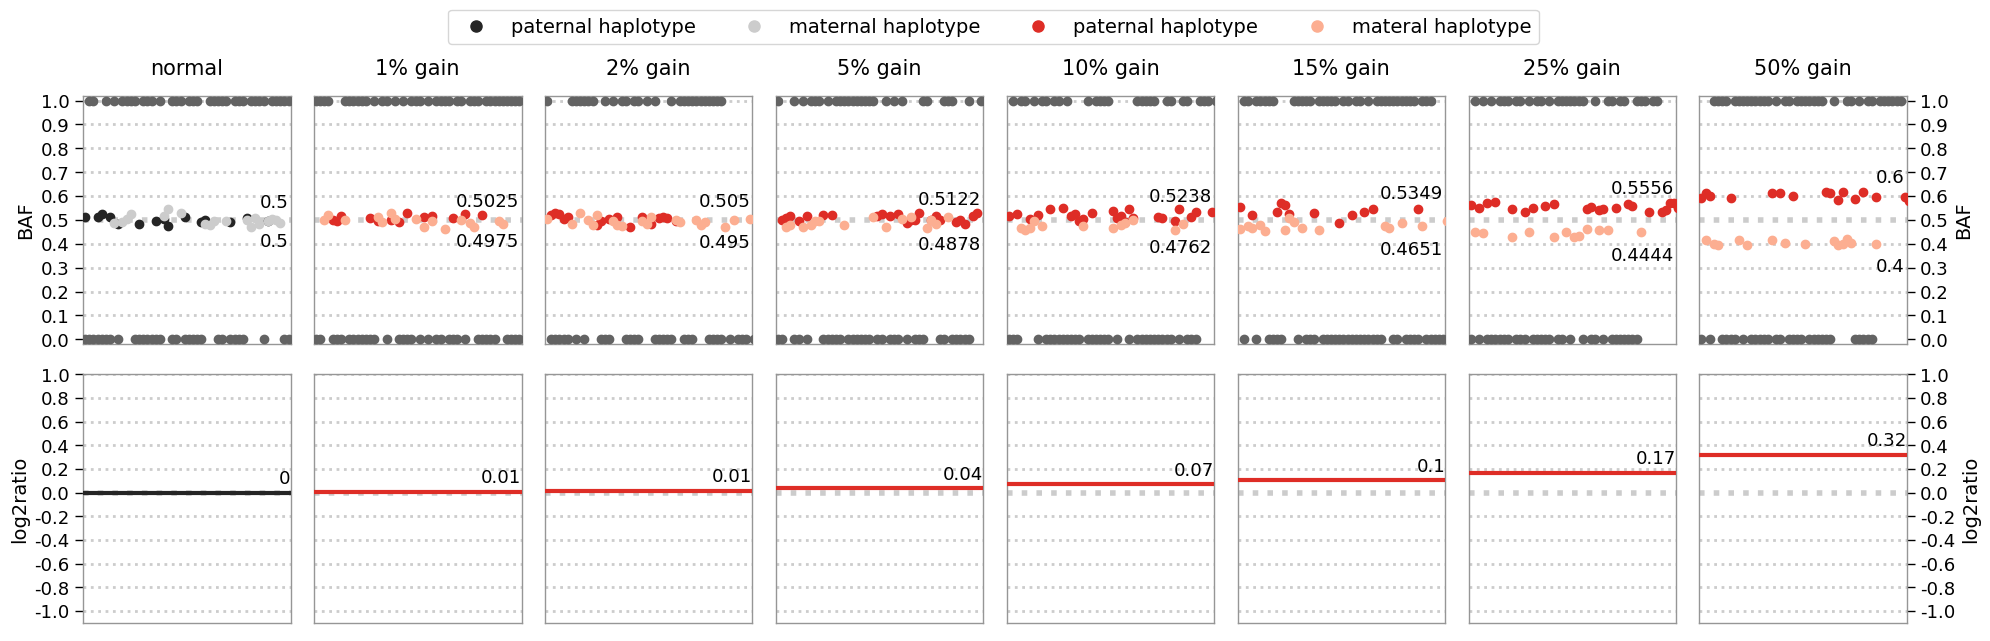

In [35]:
mCA_plots_different_cell_fractions_haplotypes('gain', 1000, 100)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:150: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


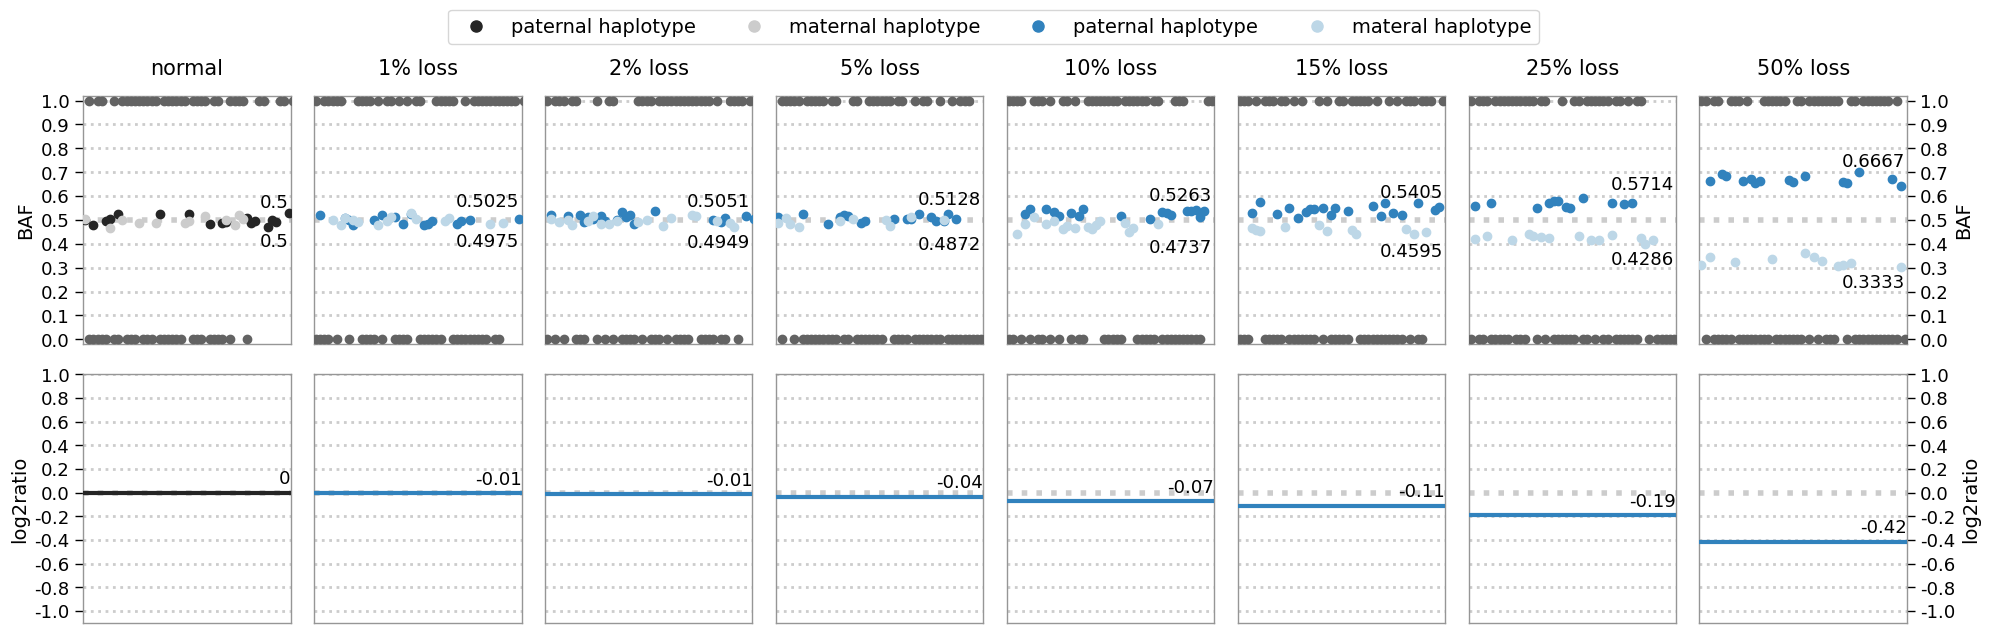

In [36]:
mCA_plots_different_cell_fractions_haplotypes('loss', 1000, 100)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:150: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


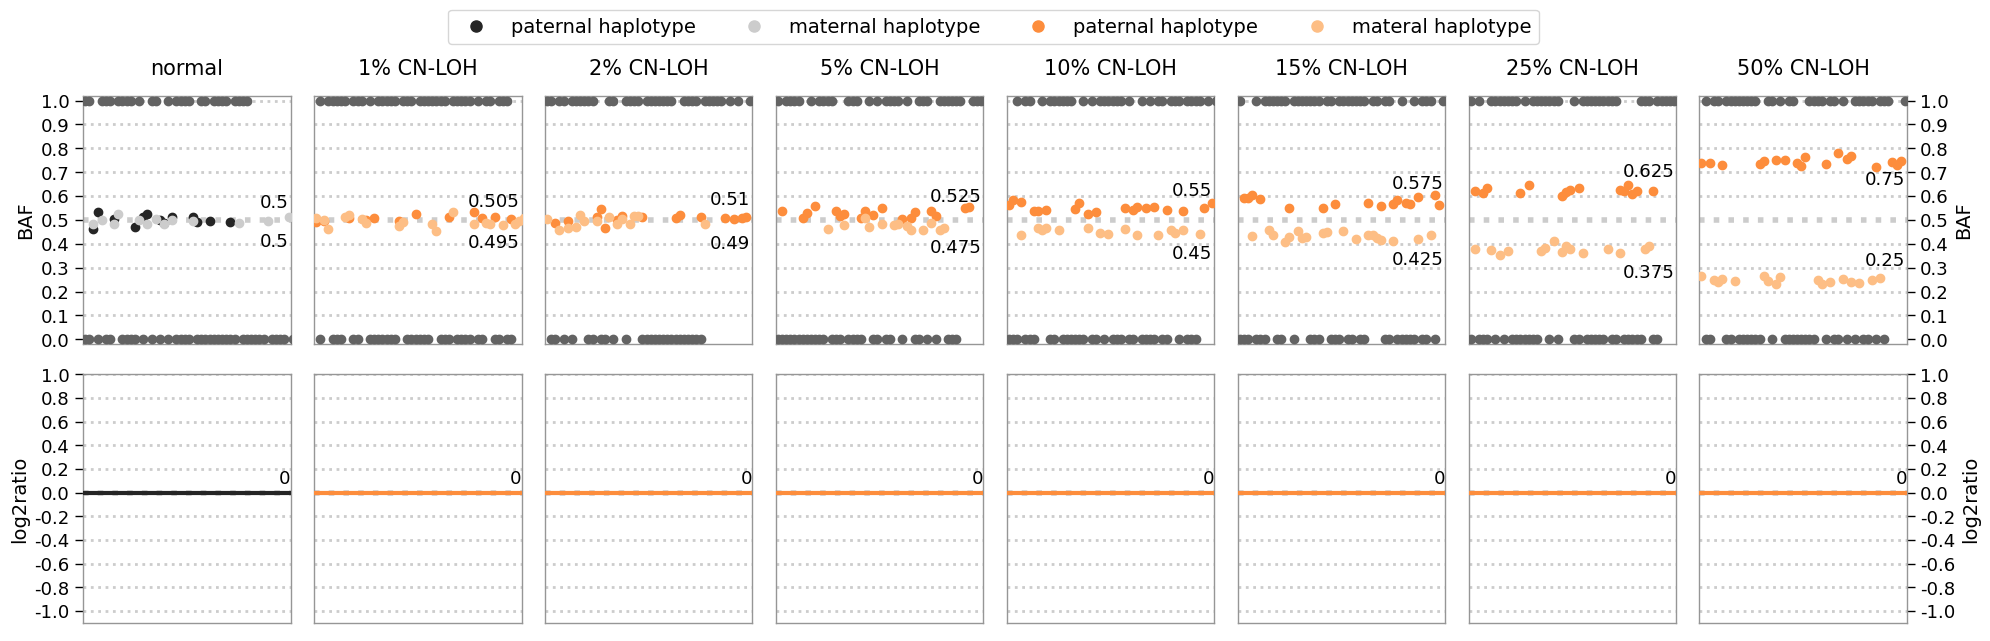

In [37]:
mCA_plots_different_cell_fractions_haplotypes('CN-LOH', 1000, 100)